In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

In [24]:
df = pd.read_csv('filtered_data_1.csv')


In [25]:
data = {
    'N': len(df),
    'Outcome': df['Outcome'].values,
    'predictors': df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
}

In [26]:
model = CmdStanModel(stan_file='code.stan')
fit = model.sample(data=data, iter_sampling=2000, chains=4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▋         | 00:01 Iteration:    1 / 3000 [  0%]  (Warmup)





chain 1 |▉         | 00:01 Iteration:  100 / 3000 [  3%]  (Warmup)


chain 1 |█▎        | 00:02 Iteration:  200 / 3000 [  6%]  (Warmup)


chain 1 |█▌        | 00:02 Iteration:  300 / 3000 [ 10%]  (Warmup)



chain 1 |█▉        | 00:02 Iteration:  400 / 3000 [ 13%]  (Warmup)


chain 1 |██▏       | 00:02 Iteration:  500 / 3000 [ 16%]  (Warmup)


chain 1 |██▌       | 00:02 Iteration:  600 / 3000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:02 Iteration:  800 / 3000 [ 26%]  (Warmup)


chain 1 |███▍      | 00:03 Iteration:  900 / 3000 [ 30%]  (Warmup)


chain 1 |████      | 00:03 Iteration: 1001 / 3000 [ 33%]  (Sampling)


chain 1 |████▍     | 00:03 Iteration: 1100 / 3000 [ 36%]  (Sampling)


chain 1 |████▋     | 00:03 Iteration: 1200 / 3000 [ 40%]  (Sampling)


chain 1 |█████     | 00:03 Iteration: 1300 / 3000 [ 43%]  (Sampling)


chain 1 |█████▎    | 00:03 Iteration: 1400 / 3000 [ 46%]  (Sampling)


chain 1 |█████▋    


INFO:cmdstanpy:CmdStan done processing.


In [27]:
print(fit)

CmdStanMCMC: model=code chains=4['method=sample', 'num_samples=2000', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp5xf2j0qz/code-20240610220720_1.csv
	/tmp/tmp5xf2j0qz/code-20240610220720_2.csv
	/tmp/tmp5xf2j0qz/code-20240610220720_3.csv
	/tmp/tmp5xf2j0qz/code-20240610220720_4.csv
 output_files:
	/tmp/tmp5xf2j0qz/code-20240610220720_0-stdout.txt
	/tmp/tmp5xf2j0qz/code-20240610220720_1-stdout.txt
	/tmp/tmp5xf2j0qz/code-20240610220720_2-stdout.txt
	/tmp/tmp5xf2j0qz/code-20240610220720_3-stdout.txt


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

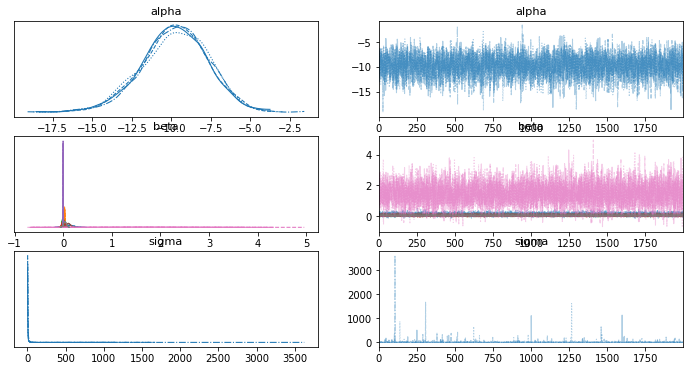

In [28]:
fit_az = az.from_cmdstanpy(
    posterior=fit
)

# Generowanie wykresów za pomocą ArviZ
az.plot_trace(fit_az)

In [29]:
new_df = pd.read_csv('filtered_data_2.csv')

In [30]:
new_data = {
    'N': len(new_df),
    'predictors': new_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
}

KeyError: "None of [Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',\n       'BMI', 'DiabetesPedigreeFunction', 'Age'],\n      dtype='object')] are in the [columns]"

In [ ]:
predictions = fit.extract()['alpha'] + np.dot(new_data['predictors'], fit.extract()['beta'].T)
predicted_outcome = 1 / (1 + np.exp(-predictions)) > 0.5

In [ ]:
new_df['PredictedOutcome'] = predicted_outcome.astype(int)

In [ ]:
new_df.to_csv('results.csv', index=False)